The purpose of this notebook is to visualize the simulated catheter's forward kinematics as it moves through the trajectory recorded in history.p

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import mpld3
# mpld3.enable_notebook()
import sys
sys.path.append("../")
from robot_model.private.ModelInterface import catheter
robot = catheter()


sns.set_style("dark")
sns.set_context("talk")
blue  = sns.color_palette("deep")[0]
green = sns.color_palette("deep")[1]

In [2]:
with open( "../robot_model/data/history_square.p", "rb" ) as input_file:
            history = pickle.load(input_file)

In [3]:
# Some arrays change size (x_desired, x_current), which make the asarray(list()) method ineffective
def RepackageArray(array, max_width, zero = 0):
    new_array = np.zeros((len(array), max_width))
    for i, row in enumerate(array):
        for j, num in enumerate(row):
            new_array[i, j] = num
    return new_array - new_array[zero,:]

In [4]:
time, x_current, x_full, x_desired, q, q_desired, J, W, amps, amps_smooth = history[0,:,:]
# For some reason this gives you 1D arrays of arrays that won't let you index through them. Below allows that.
time_array = np.asarray(list(time))
start = 500
end   = round(history.shape[-1] - 0.35*history.shape[-1])
x_current = RepackageArray(x_current, 5, start)
x_full = np.asarray(list(x_full))
x_desired = RepackageArray(x_desired, 5, start)
q = np.asarray(list(q))
q_desired = np.asarray(list(q_desired))
# print(J.shape)
# J = np.asarray(list(J))
# W = np.asarray(list(W))
# amps = np.asarray(list(amps))
# amps_smooth = np.asarray(list(amps_smooth))

x, y, z, a, e = [x_full[start:,0] - x_full[start,0],
                 x_full[start:,1] - x_full[start,1], 
                 x_full[start:,2] - x_full[start,2],
                 x_full[start:,3] - x_full[start,3],
                 x_full[start:,4] - x_full[start,4]]


In [5]:
history.shape

C:\Anaconda3\envs\py35\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Anaconda3\envs\py35\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


(1, 10, 5794)

In [6]:
num_points = 10
def getModelPrediction(q_offset, q_scale):
    q_model = (q[:]-q_offset).dot(q_scale)
    body = np.asarray([robot.GetPointsAlongBody(qi, num_points) for qi in q_model])
    return body
    

In [7]:
qs = [np.ones(4), np.ones(4)]
qs

[array([ 1.,  1.,  1.,  1.]), array([ 1.,  1.,  1.,  1.])]

In [8]:
q_offset = np.copy(q[1,:])
q_offset[-2] += 30 #anticipating flip with q[-1]
scalar = 0.1
q_scale  = np.eye(10)
q_scale[:4,:4] *= 1 #sheath
q_scale[4:,4:] *= 1 #leader
q_scale[8,8] = 0
q_scale[9,9] = 0
q_scale[8,9] = -1
body = getModelPrediction(q_offset, q_scale)
x_model, y_model, z_model, a_model, e_model = body.T[:,-1,:] # transpose allows them to be unpacked easily

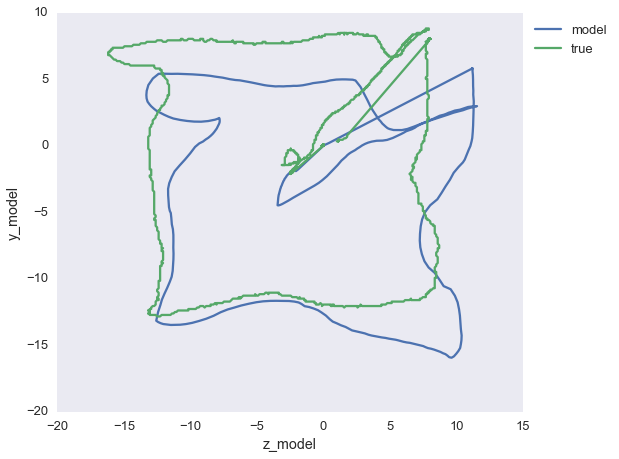

In [9]:
plt.plot(y_model, z_model,'-', label = 'model')
plt.plot(y, z,'-',label = 'true')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.axes().set_aspect('equal')
plt.xlabel('z_model')
plt.ylabel('y_model')

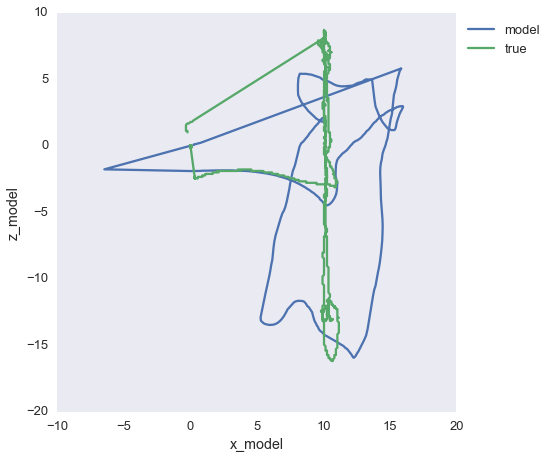

In [10]:
plt.plot(x_model[1:]-x_model[1], z_model[1:],'-', label = 'model')
plt.plot(x,y,'-',label = 'true')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.axes().set_aspect('equal')
plt.xlabel('x_model')
plt.ylabel('z_model')

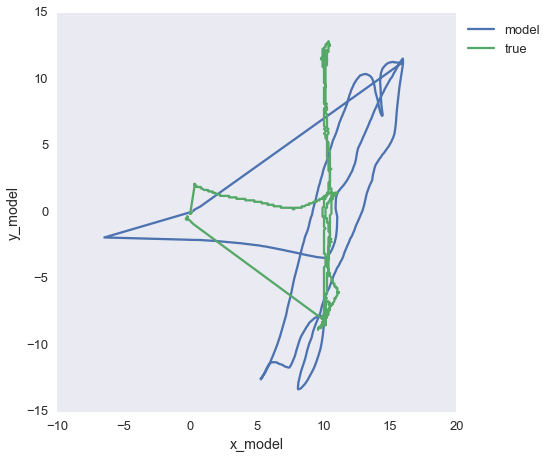

In [11]:
plt.plot(x_model[1:]-x_model[1], y_model[1:],'-', label = 'model')
plt.plot(x,-z,'-',label = 'true')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.axes().set_aspect('equal')
plt.xlabel('x_model')
plt.ylabel('y_model')

(5794, 10) (5794,) (5294,)


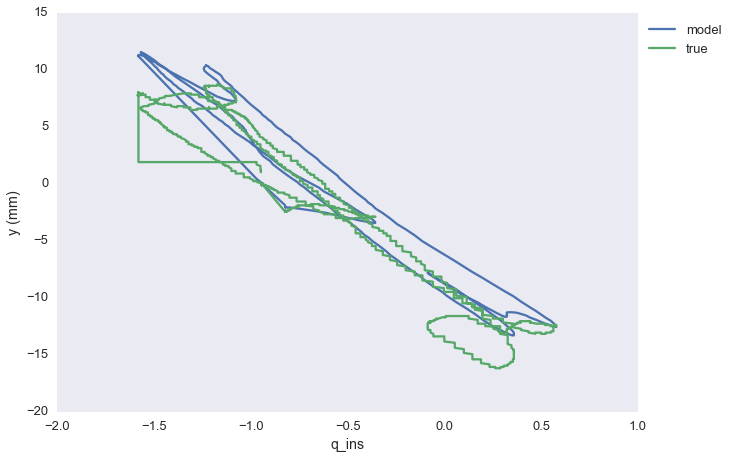

In [12]:
print(q.shape, y_model.shape, y.shape)
plt.plot(q[:,4], y_model, label = 'model')
plt.plot(q[500:,4], y, label = 'true')
plt.xlabel('q_ins')
plt.ylabel('y (mm)')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

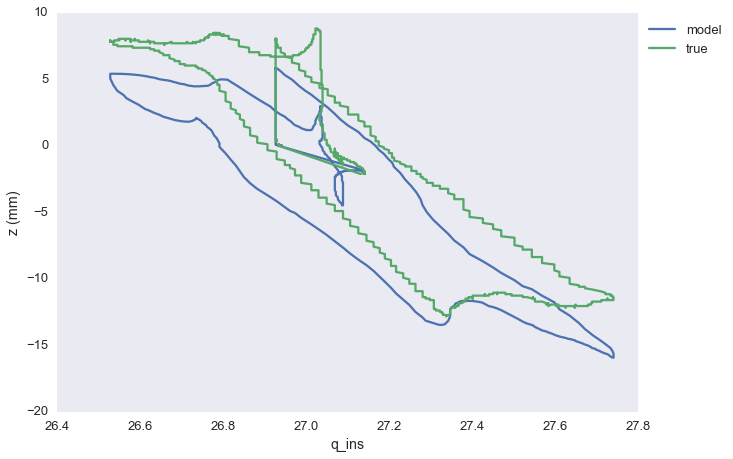

In [13]:
plt.plot(q[:,5], z_model, label = 'model')
plt.plot(q[500:,5], z, label = 'true')
plt.xlabel('q_ins')
plt.ylabel('z (mm)')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

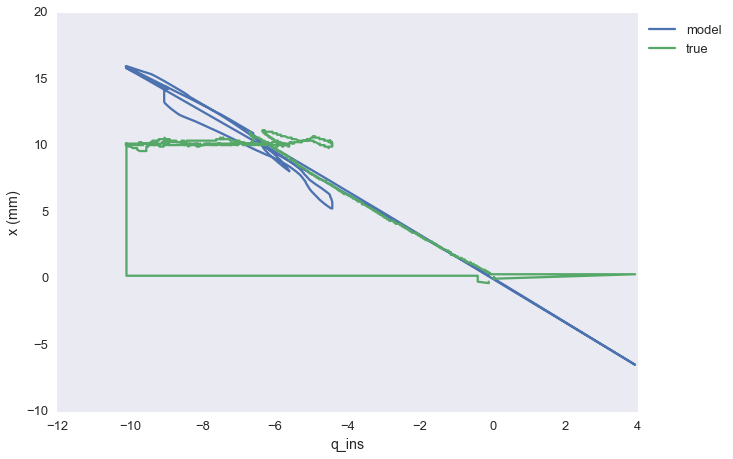

In [14]:
plt.plot(q[:,8], x_model - x_model[1], label = 'model')
plt.plot(q[500:,8], x, label = 'true')
plt.xlabel('q_ins')
plt.ylabel('x (mm)')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))

ValueError: x and y must have same first dimension

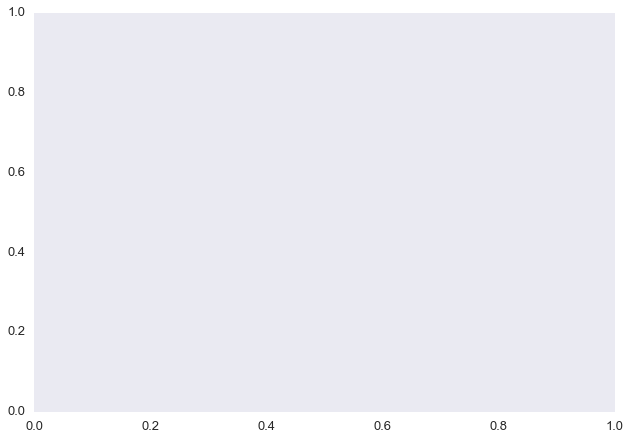

In [15]:
plt.plot(z_model,y[2:])
plt.plot([-15,15],[-15,15])
plt.xlabel('z_model')
plt.ylabel('y_true')

In [ ]:
print(x_model.shape, )
plt.plot(x_model[500:]-x_model[1],x)
plt.plot([-5,15],[-5,15])
plt.xlabel('x_model')
plt.ylabel('x_true')

In [ ]:
1/6


In [ ]:
plt.plot(a_model*180/np.pi, e_model*180/np.pi)
plt.plot(e,a)


In [ ]:
plt.plot(q[:,:4] - q[0,:4])

In [ ]:
plt.plot(q[:,8])

In [ ]:
i_list = np.linspace(0, body.shape[0]-1, 50)
for ix, i in enumerate(i_list):
    i = int(i)
    plt.plot(body[i, :num_points,0], body[i, :num_points,1], color = blue, alpha = ix/len(i_list))
    plt.plot(body[i, num_points:,0], body[i, num_points:,1], color = green, alpha = ix/len(i_list))
plt.axes().set_aspect('equal')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')